In [18]:
import os
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Función para explorar el tamaño de la base de datos y enlistar columnas
def explorar_dataframe(archivo):
    df = pd.read_parquet(archivo)  # Cargar el archivo parquet
    print(f"Explorando el archivo: {archivo}")
    print(f"Tamaño del DataFrame: {df.shape}")  # Muestra el tamaño (filas, columnas)
    print("Columnas del DataFrame:", df.columns.tolist())  # Lista de nombres de columnas
    print("\n")

# Ruta de la carpeta donde se encuentran los archivos parquet
folder_path = '/home/nicolas/despliegue_analytica/files_parquet/'

# Listar archivos parquet en el directorio
archivos_en_directorio = os.listdir(folder_path)

# Filtrar solo los archivos parquet
archivos_parquet = [archivo for archivo in archivos_en_directorio if archivo.endswith('.parquet')]

# Explorar cada archivo
for archivo in archivos_parquet:
    explorar_dataframe(os.path.join(folder_path, archivo))  # Combina la ruta de la carpeta con el nombre del archivo


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/olist_order_reviews_dataset.parquet
Tamaño del DataFrame: (104162, 7)
Columnas del DataFrame: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/product_category_name_translation.parquet
Tamaño del DataFrame: (71, 2)
Columnas del DataFrame: ['product_category_name', 'product_category_name_english']


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/olist_order_payments_dataset.parquet
Tamaño del DataFrame: (103886, 5)
Columnas del DataFrame: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/olist_order_items_dataset.parquet
Tamaño del DataFrame: (112650, 7)
Columnas del DataFrame: ['order_id', 'order_item_id', 'prod

Se exploran las dimenciones de cada una de las bases de datos iniciales con las que se dispone, así como el nombre de cada una de las variables que estás contienen.

In [22]:
import os
import pandas as pd
import dask.dataframe as dd

# Función para explorar el tamaño de la base de datos y enlistar columnas
def explorar_dataframe(archivo):
    return pd.read_parquet(archivo)  # Cargar el archivo parquet

# Ruta de la carpeta donde se encuentran los archivos parquet
folder_path = '/home/nicolas/despliegue_analytica/files_parquet/'

# Listar archivos parquet en el directorio
archivos_en_directorio = os.listdir(folder_path)

# Filtrar solo los archivos parquet
archivos_parquet = [archivo for archivo in archivos_en_directorio if archivo.endswith('.parquet')]

# Cargar todos los DataFrames en un diccionario
dataframes = {}
for archivo in archivos_parquet:
    df_name = archivo.split('.')[0]  # Nombre del archivo sin extensión
    dataframes[df_name] = explorar_dataframe(os.path.join(folder_path, archivo))

# Combinarr los DataFrames según los ids y relaciones
df_joined = (dataframes['olist_orders_dataset']  # Comenzamos con el conjunto de pedidos
              .merge(dataframes['olist_order_items_dataset'], on='order_id', how='left')  # Unimos los artículos por order_id
              .merge(dataframes['olist_order_payments_dataset'], on='order_id', how='left')  # Unimos pagos por order_id
              .merge(dataframes['olist_customers_dataset'], on='customer_id', how='left')  # Unimos clientes por customer_id
              .merge(dataframes['olist_products_dataset'], on='product_id', how='left')  # Unimos productos por product_id
              .merge(dataframes['olist_sellers_dataset'], on='seller_id', how='left')  # Unimos vendedores por seller_id
              .merge(dataframes['olist_order_reviews_dataset'], on='order_id', how='left'))  # Unimos reseñas por order_id

# Convertir el DataFrame combinado a un Dask DataFrame
df_dask = dd.from_pandas(df_joined, npartitions=2)

# Visualizamos el resultado
print(f"Tamaño del DataFrame combinado: {df_joined.shape}")
print("Columnas del DataFrame combinado:", df_joined.columns.tolist())



Tamaño del DataFrame combinado: (119143, 39)
Columnas del DataFrame combinado: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


Para facilitar el analisis y expliración de los datos, de hace un merge entre las bases de datos originales de acuerdo a la key dispuesta para relacionar la información.

In [23]:
# Tamaño del DataFrame
num_rows, num_cols = df_joined.shape
print("Número de filas:", num_rows)
print("Número de columnas:", num_cols)

# Estadísticas descriptivas
stats = df_joined.describe()
print("Estadísticas descriptivas:\n", stats)

# Conteo de valores nulos por columna
null_counts = df_joined.isnull().sum()
print("Conteo de valores nulos por columna:\n", null_counts)

# Tipos de variables
dtypes = df_joined.dtypes
print("Tipos de variables:\n", dtypes)

# Primeras 5 filas del DataFrame
print("Primeras 5 filas del DataFrame:\n", df_joined.head())


Número de filas: 119143
Número de columnas: 39
Estadísticas descriptivas:
             order_purchase_timestamp              order_approved_at  \
count                         119143                         118966   
mean   2017-12-29 21:18:41.606229504  2017-12-30 07:31:48.559378176   
min              2016-09-05 00:15:19            2016-09-15 15:16:38   
25%              2017-09-10 23:15:46     2017-09-11 18:50:48.500000   
50%              2018-01-17 13:59:12            2018-01-17 18:49:49   
75%              2018-05-03 16:18:30            2018-05-03 19:56:53   
max              2018-10-17 20:30:18            2018-09-03 20:40:06   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                         117057                         115722   
mean   2018-01-03 11:07:19.761116416  2018-01-12 23:39:31.299631872   
min              2016-10-08 13:34:01            2016-10-11 16:46:32   
2

* El análisis del DataFrame revela que contiene un total de 119,143 filas y 39 columnas, lo que sugiere una base de datos considerable para el estudio de órdenes de compra. 

* Las estadísticas descriptivas muestran que las fechas de las órdenes de compra varían desde el 5 de septiembre de 2016 hasta el 17 de octubre de 2018. Las columnas relacionadas presentan valores nulos, indicando que algunos pedidos no fueron entregados según lo previsto.

* En cuanto a las estadísticas numéricas, el precio medio de los productos es de 120.65 reales, con un valor de flete promedio de 20.03 reales. Sin embargo, se presentan discrepancias notables en los datos, ya que hay valores nulos en varias columnas, como order_approved_at, order_delivered_carrier_date, y order_delivered_customer_date, lo que puede complicar un análisis enfocado en de la eficiencia en la entrega (para este ejercicio el enfoque esta en predicion de precios y demanada, no eficiencias de entrega). 

* Además, el análisis muestra que las variables de longitud, peso y dimensiones de los productos también tienen una cantidad significativa de valores nulos, lo que podría limitar las conclusiones sobre la relación entre estas características y otros aspectos, como el precio o el tiempo de entrega.

* Los tipos de variables en el DataFrame incluyen una mezcla de datos categóricos y numéricos, así como datos temporales. En particular, se observa que la mayoría de las columnas son de tipo object, seguidas de float64 para los datos numéricos y datetime64 para las fechas. Por último, las primeras cinco filas del DataFrame proporcionan una visión inicial de la estructura de los datos, mostrando pedidos con información sobre el estado, las fechas de compra y entrega, así como los detalles del producto y del vendedor. Esto establece una base sólida para un análisis más profundo de los patrones de compra y entrega en la plataforma.

* Dado el considerable tamaño de valores nulos en las varaibles relacionadas a la calificación del producto y expriencia de usuario se determina descartar el uso de esta información para el analisis, pues eliminar los valores nulos o tener en cuenta lo pocos que se han dispuesto puede afectar la efectividad del modelo.

In [32]:
import pandas as pd

# Eliminar columnas especificadas
columnas_a_eliminar = [
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "review_id",
    "review_score",
    "review_comment_title",
    "review_comment_message",
    "review_creation_date",
    "review_answer_timestamp",
    "review_comment_message"
]

df_joined_cleaned = df_joined.drop(columns=columnas_a_eliminar)

# Mostrar el tamaño del DataFrame antes y después de la eliminación de columnas
print(f"Tamaño original: {df_joined.shape}")
print(f"Tamaño después de eliminar columnas: {df_joined_cleaned.shape}")

# Conteo de valores nulos por columna
null_counts = df_joined_cleaned.isnull().sum()
print("Conteo de valores nulos por columna:\n", null_counts)


Tamaño original: (119143, 39)
Tamaño después de eliminar columnas: (119143, 31)
Conteo de valores nulos por columna:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_estimated_delivery_date       0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name            2542
product_name_lenght              2542
product_description_lenght       2542
product_

Despues de la depuración de varaibles con alto grado de valores nulos, se procede a eliminar los valores nulos de variables. Si bien existen grupos de tamañop considerable (como product_category_name con una cantidad de nulos de 2542), estos son se estiman relevantes para el entrenamiento del modelo, de manerta que se matienen las variables a costa de eliminar sus registros invalidos.

In [39]:
import os

# Ruta donde deseas guardar el archivo
save_path = r'\\wsl.localhost\Ubuntu-24.04\home\nicolas\despliegue_analytica\files_parquet'

# Eliminar filas con valores nulos en df_joined_cleaned
df_joined_cleaned_no_nulls = df_joined_cleaned.dropna()

# Mostrar el tamaño del DataFrame antes y después de eliminar valores nulos
print(f"Tamaño original: {df_joined_cleaned.shape}")
print(f"Tamaño después de eliminar filas con valores nulos: {df_joined_cleaned_no_nulls.shape}")

# Conteo de valores nulos por columna
null_counts = df_joined_cleaned_no_nulls.isnull().sum()
print("Conteo de valores nulos por columna:\n", null_counts)

# Guardar el DataFrame limpio sin nulos
df_joined_cleaned_no_nulls.to_parquet(os.path.join(save_path, 'df_joined_cleaned_no_nulls.parquet'))




Tamaño original: (119143, 31)
Tamaño después de eliminar filas con valores nulos: (116583, 31)
Conteo de valores nulos por columna:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g           

Se guarda la base de datos depurada sin valores nulos como "df_joined_cleaned_no_nulls.parquet"

Número de filas: 115888
Número de columnas: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115888 entries, 0 to 115887
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115888 non-null  object        
 1   customer_id                    115888 non-null  object        
 2   order_status                   115888 non-null  object        
 3   order_purchase_timestamp       115888 non-null  datetime64[ns]
 4   order_approved_at              115888 non-null  datetime64[ns]
 5   order_estimated_delivery_date  115888 non-null  datetime64[ns]
 6   order_item_id                  115888 non-null  float64       
 7   product_id                     115888 non-null  object        
 8   seller_id                      115888 non-null  object        
 9   shipping_limit_date            115888 non-null  datetime64[ns]
 10  price                

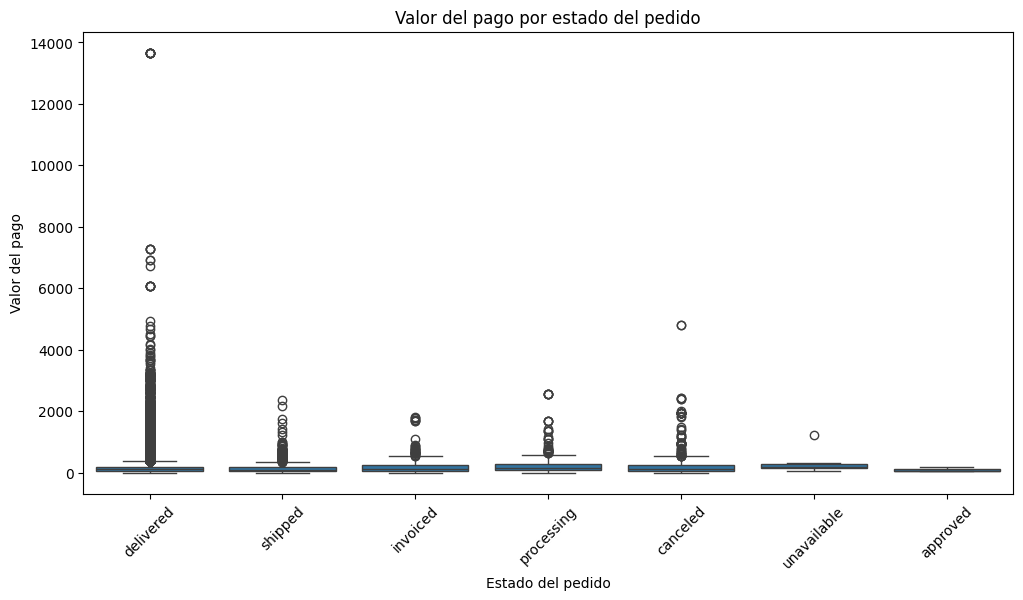

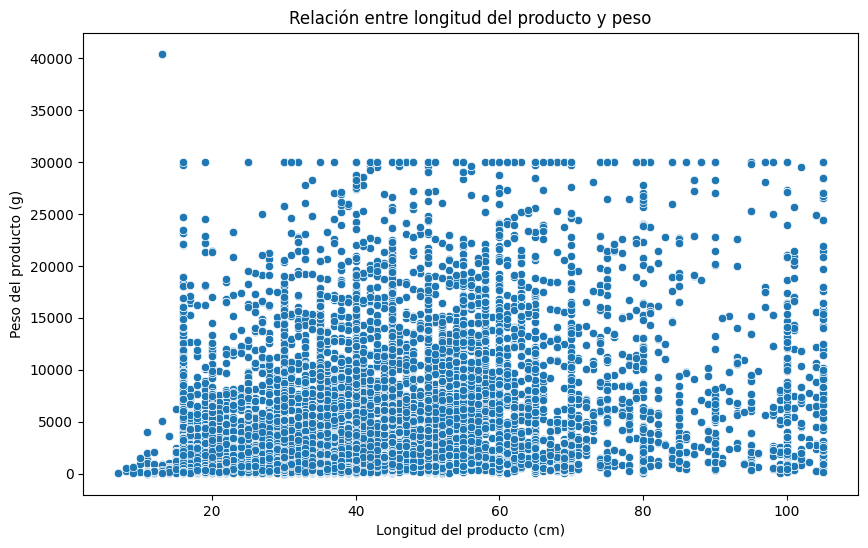

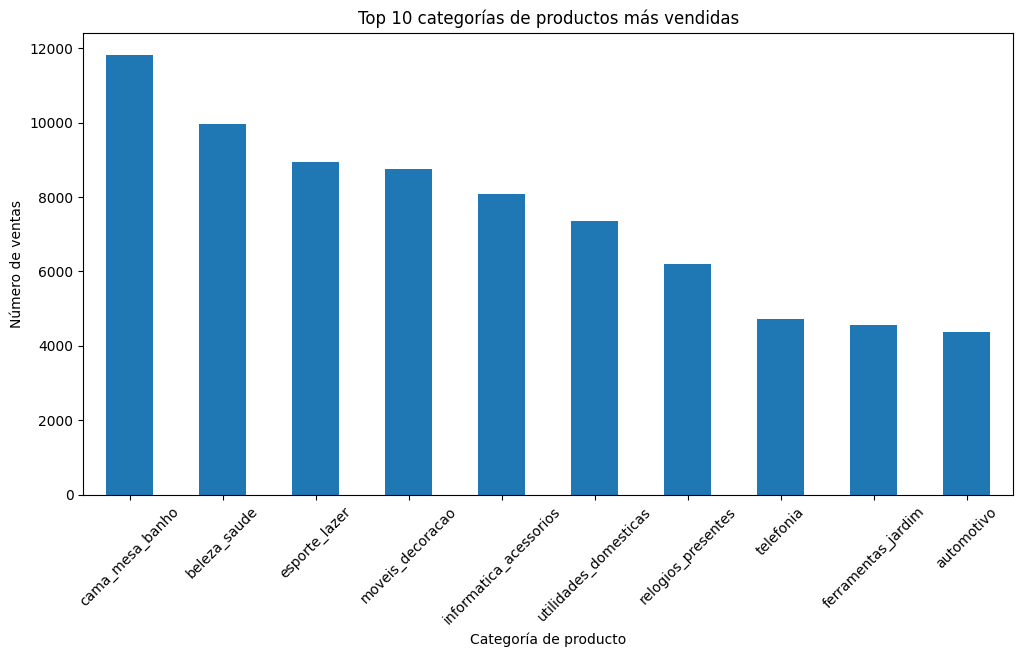

In [44]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualizar las dimensiones del DataFrame
print(f"Número de filas: {df_joined_cleaned_no_nulls.shape[0]}")
print(f"Número de columnas: {df_joined_cleaned_no_nulls.shape[1]}")

# 2. Obtener información general sobre el DataFrame
print(df_joined_cleaned_no_nulls.info())

# 3. Describir las estadísticas descriptivas de las columnas numéricas
print(df_joined_cleaned_no_nulls.describe()) 

# 4. Ver las primeras filas del DataFrame
print(df_joined_cleaned_no_nulls.head())

# 5. Analizar la distribución de las calificaciones de revisión (ajustar si es necesario)
if 'review_score' in df_joined_cleaned_no_nulls.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='review_score', data=df_joined_cleaned_no_nulls)
    plt.title('Distribución de las calificaciones de revisión')
    plt.xlabel('Calificación de revisión')
    plt.ylabel('Frecuencia')
    plt.show()

# 6. Analizar el tiempo de entrega
if 'order_delivered_customer_date' in df_joined_cleaned_no_nulls.columns and 'order_purchase_timestamp' in df_joined_cleaned_no_nulls.columns:
    df_joined_cleaned_no_nulls['delivery_time'] = (pd.to_datetime(df_joined_cleaned_no_nulls['order_delivered_customer_date']) - 
                                                   pd.to_datetime(df_joined_cleaned_no_nulls['order_purchase_timestamp'])).dt.days
    plt.figure(figsize=(10, 6))
    sns.histplot(df_joined_cleaned_no_nulls['delivery_time'].dropna(), bins=30, kde=True)
    plt.title('Distribución del tiempo de entrega (días)')
    plt.xlabel('Días de entrega')
    plt.ylabel('Frecuencia')
    plt.show()

# 7. Relación entre el valor del pago y el estado del pedido
if 'payment_value' in df_joined_cleaned_no_nulls.columns and 'order_status' in df_joined_cleaned_no_nulls.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='order_status', y='payment_value', data=df_joined_cleaned_no_nulls)
    plt.title('Valor del pago por estado del pedido')
    plt.xlabel('Estado del pedido')
    plt.ylabel('Valor del pago')
    plt.xticks(rotation=45)
    plt.show()

# 8. Analizar la relación entre las dimensiones del producto y su peso
if 'product_weight_g' in df_joined_cleaned_no_nulls.columns and 'product_length_cm' in df_joined_cleaned_no_nulls.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='product_length_cm', y='product_weight_g', data=df_joined_cleaned_no_nulls)
    plt.title('Relación entre longitud del producto y peso')
    plt.xlabel('Longitud del producto (cm)')
    plt.ylabel('Peso del producto (g)')
    plt.show()

# 9. Agrupar por categoría de producto y contar
if 'product_category_name' in df_joined_cleaned_no_nulls.columns:
    category_counts = df_joined_cleaned_no_nulls['product_category_name'].value_counts()
    plt.figure(figsize=(12, 6))
    category_counts.head(10).plot(kind='bar')
    plt.title('Top 10 categorías de productos más vendidas')
    plt.xlabel('Categoría de producto')
    plt.ylabel('Número de ventas')
    plt.xticks(rotation=45)
    plt.show()


* Las estadísticas descriptivas de las columnas numéricas del DataFrame revelan información clave sobre los datos. En cuanto a los precios, la media es de 120.93, con un mínimo de 0.85 y un máximo de 6735.00; la desviación estándar es de 184.19. En lo que respecta al valor de flete, la media es de 20.08, el mínimo es 0.00 y el máximo alcanza 409.68, con una desviación estándar de 15.87. Las fechas de compra muestran una fecha mínima de 2016-09-05 y una máxima de 2018-09-03, con un promedio de 2017-12-31.

* Al visualizar las primeras filas del DataFrame, se pueden observar ejemplos concretos de los datos, confirmando que las columnas están correctamente pobladas. A partir de esta información, se pueden considerar diversas áreas de análisis, como el estudio de tendencias de ventas a lo largo del tiempo utilizando las fechas de compra para identificar patrones estacionales, el análisis de los productos más vendidos mediante product_id y order_item_id, y la evaluación del impacto del flete en las ventas comparando price y freight_value.

* Grafica 1 / Valor del pago por estado del pedido: Esta gráfica presenta la distribución del valor del pago según diferentes estados del pedido, como "delivered", "shipped", "invoiced", "processing", etc. La mayoría de los pagos están concentrados en valores bajos, pero existen algunos valores atípicos (outliers) que alcanzan hasta los 14,000. En particular, el estado "delivered" parece tener una mayor variabilidad y más valores atípicos que el resto de los estados, lo que sugiere que hay una amplia gama de pagos en pedidos entregados, posiblemente debido a diferencias en los tipos de productos o en el tamaño de los pedidos.

* Grafica 2 / Relación entre longitud del producto y peso: Esta gráfica muestra la relación entre la longitud (en cm) y el peso (en gramos) de los productos. A simple vista, no parece haber una relación clara o lineal entre la longitud y el peso; los puntos están distribuidos de manera dispersa. Sin embargo, se observa que a medida que la longitud aumenta, el peso de los productos tiende a ser más variable, y algunos productos de longitud media (alrededor de 50-80 cm) alcanzan pesos altos, lo cual puede indicar que los productos más largos no siempre son más pesados.

* Grafica 3 / Top 10 productos más vendidos según su categoria: Se observa que las categorías de hogaar, belleza, bienestar y tecnología liderán las ventas del market place Olist.

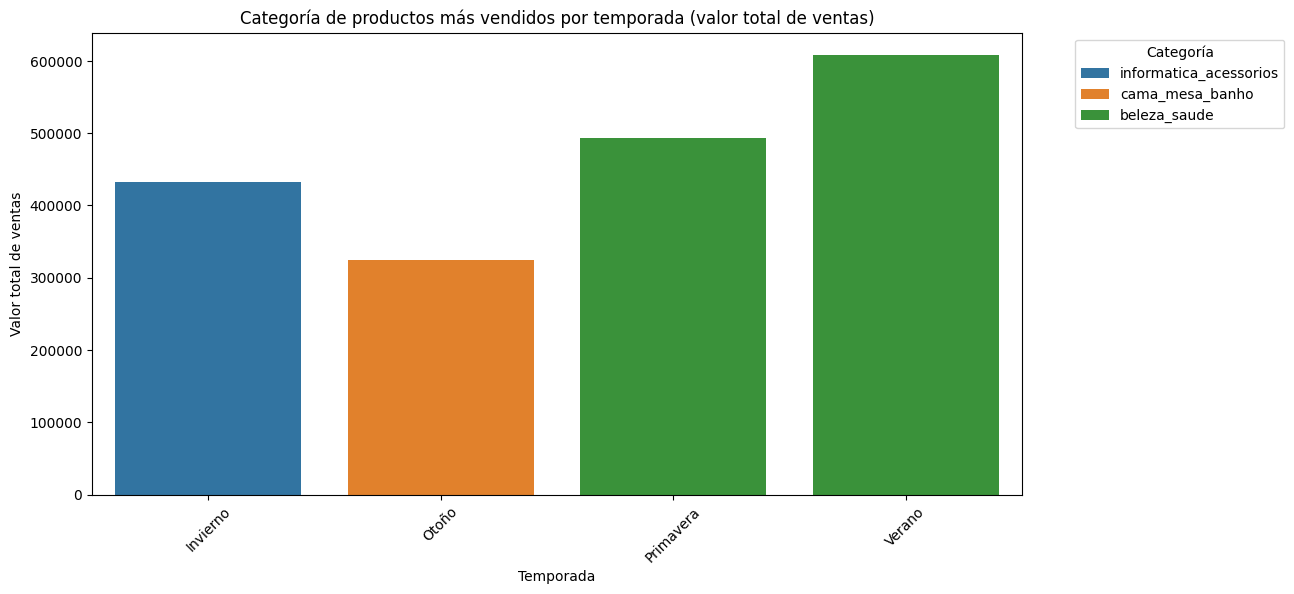

In [52]:
# Asegurarse de que las fechas están en formato datetime
df_joined_cleaned_no_nulls['order_purchase_timestamp'] = pd.to_datetime(df_joined_cleaned_no_nulls['order_purchase_timestamp'])

# Extraer el mes
df_joined_cleaned_no_nulls['month'] = df_joined_cleaned_no_nulls['order_purchase_timestamp'].dt.month

# Función para asignar la temporada
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# Aplicar la función para crear la columna de temporada (sin 'meta')
df_joined_cleaned_no_nulls['season'] = df_joined_cleaned_no_nulls['month'].apply(assign_season)

# Calcular el valor total de ventas
df_joined_cleaned_no_nulls['total_value'] = df_joined_cleaned_no_nulls['payment_value']

# Agrupar por temporada y categoría, y sumar las ventas
seasonal_sales = df_joined_cleaned_no_nulls.groupby(['season', 'product_category_name'])['total_value'].sum().reset_index()

# Crear un índice único en el DataFrame usando numpy
seasonal_sales['temp_index'] = np.arange(len(seasonal_sales))

# Establecer el índice único
seasonal_sales = seasonal_sales.set_index('temp_index')

# Calcular los índices de los productos más vendidos por temporada
idx_max = seasonal_sales.groupby('season')['total_value'].idxmax()

# Obtener los productos más vendidos por temporada usando los índices calculados
top_products = seasonal_sales.loc[idx_max].reset_index(drop=True)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='season', y='total_value', hue='product_category_name')
plt.title('Categoría de productos más vendidos por temporada (valor total de ventas)')
plt.xlabel('Temporada')
plt.ylabel('Valor total de ventas')
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



La grafica de categoria de producto vendido por temporeda sugiere que "beleza_saude" tiene una gran demanda tanto en primavera como en verano, mientras que en invierno se observa un aumento en la venta de productos tecnológicos. Esto puede reflejar una estacionalidad en las preferencias de los clientes, probablemente impulsada por factores como el clima o eventos de temporada.